<a href="https://colab.research.google.com/github/ahdann/Analisis-Manova/blob/main/Analisis_Manova_Media_Sosial_Mahasiswa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#REMEDIAL STATISTIKA MULTIVARIAT
Nama : Muhammad Akhdan A`qil I
NIM : 11220940000041


In [ ]:
!pip install pingouin

In [ ]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA
from scipy.stats import boxcox


In [ ]:
# Baca file CSV
df = pd.read_csv('/content/Students Social Media Addiction.csv')

# Simpan ke Excel (XLSX)
df.to_excel('Penggunaan_Medsos.xlsx', index=False, engine='openpyxl')

df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


# MANOVA
Seorang dosen ingin menguji mahasiswa laki-laki dan mahasiswa perempuan pada penggunaan media sosial sehari-hari. Untuk itu, dosen mengambil sample beberapa mahasiswa laki-laki dan perempuan yang yang menggunakan aplikasi media sosial. Selama sebulan, 1 kelompok diberi obat A, 1 kelompok diberi obat B, dan 1 kelompok tidak diberi obat sama sekali. Kemudian, mereka membandingkan data berat badan, kolesterol, dan gula darah dari ke-3 kelompok

In [ ]:
data_manova = pd.read_excel("/content/Penggunaan_Medsos.xlsx")
data_manova

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


## Uji Normalitas Multivariat

In [ ]:
data_Female_numeric = data_manova.loc[data_manova['Gender']=='Female', ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score','Conflicts_Over_Social_Media','Addicted_Score' ]]
data_Male_numeric = data_manova.loc[data_manova['Gender']=='Male', ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night','Mental_Health_Score', 'Conflicts_Over_Social_Media','Addicted_Score']]


In [ ]:
print('Uji normalitas multivariat Female: ', pg.multivariate_normality(data_Female_numeric, alpha=0.05))
print('Uji normalitas multivariat Male: ', pg.multivariate_normality(data_Male_numeric, alpha=0.05))

Uji normalitas multivariat Female:  HZResults(hz=np.float64(9.541932469167815), pval=np.float64(1.4891990297928185e-289), normal=False)
Uji normalitas multivariat Male:  HZResults(hz=np.float64(11.753801088229693), pval=np.float64(0.0), normal=False)


Data tidak berdistribusi normal multivariat, sehingga kita perlu menerapkan transformasi data

In [ ]:
#Transformasi
data_Female_trans = np.sqrt(data_Female_numeric)
data_Male_trans = np.sqrt(data_Male_numeric)

Lalu lakukan lagi uji normalitas multivariatnya

In [ ]:
print('Uji normalitas multivariat Female: ', pg.multivariate_normality(data_Female_trans, alpha=0.05))
print('Uji normalitas multivariat Male: ', pg.multivariate_normality(data_Male_trans, alpha=0.05))

Uji normalitas multivariat Female:  HZResults(hz=np.float64(9.686009768574856), pval=np.float64(3.0672162990204865e-293), normal=False)
Uji normalitas multivariat Male:  HZResults(hz=np.float64(11.817544915181674), pval=np.float64(0.0), normal=False)


## Uji Homogenitas

In [ ]:
#Gabungkan lagi datanya
data_trans_manova = pd.concat([data_Female_trans, data_Male_trans])
data_trans_manova['Gender'] = data_manova['Gender'].copy()
data_trans_manova

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender
0,2.280351,2.549510,2.449490,1.732051,2.828427,Female
2,2.449490,2.236068,2.236068,2.000000,3.000000,Female
5,2.683282,2.121320,2.000000,2.236068,3.000000,Female
7,2.408319,2.449490,2.449490,1.414214,2.828427,Female
9,1.816590,2.645751,2.645751,1.000000,2.000000,Female
...,...,...,...,...,...,...
695,2.345208,2.588436,2.449490,1.732051,2.645751,Male
697,2.190890,2.664583,2.645751,1.414214,2.236068,Male
699,2.489980,2.509980,2.236068,2.000000,2.828427,Male
701,2.607681,2.428992,2.000000,2.236068,3.000000,Male


In [ ]:
#Uji Homogenitas
pg.box_m(data_trans_manova, dvs=['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score','Conflicts_Over_Social_Media','Addicted_Score'],group= 'Gender')

,Chi2,df,pval,equal_cov
box,136.637475,15.0,1.058357e-21,False


## MANOVA

Karena pada uji homogenitas, data menunjukkan homogen. Maka gunakan generalized MANOVA yaitu dengan pillai`s trace.

In [ ]:
# Standard MANOVA dengan Pillai's trace
manova = MANOVA.from_formula('Avg_Daily_Usage_Hours + Sleep_Hours_Per_Night + Mental_Health_Score + Conflicts_Over_Social_Media + Addicted_Score ~ Gender', data=data_trans_manova)
print("\nMANOVA Results with Pillai's Trace:")
print(manova.mv_test())


MANOVA Results with Pillai's Trace:
                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF    F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda    0.0005 5.0000 699.0000 281974.6381 0.0000
         Pillai's trace    0.9995 5.0000 699.0000 281974.6381 0.0000
 Hotelling-Lawley trace 2016.9860 5.0000 699.0000 281974.6381 0.0000
    Roy's greatest root 2016.9860 5.0000 699.0000 281974.6381 0.0000
--------------------------------------------------------------------
                                                                    
---------------------------------------------------------------------
            Gender          Value   Num DF   Den DF   F Value  Pr > F
---------------------------------------------------------------------
             Wil

Kita bisa pilih salah 1 dari 4 statistik ini. Di case ini ke-4 statistik sama-sama menunjukkan bahwa ada perbedaan yang signifikan antar kelompok di ke-4 variabel dependent


## Uji Post Hoc

Disini kita akan melihat pasangan kelompok mana yang berbeda signifikan antar ke-5 nya

In [ ]:
tukey_usage = pg.pairwise_tukey(data=data_trans_manova, dv='Avg_Daily_Usage_Hours', between='Gender')
print("\nTukey Post-hoc untuk variabel Avg_Daily_Usage_Hours")
tukey_usage


Tukey Post-hoc untuk variabel Avg_Daily_Usage_Hours


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Female,Male,2.218262,2.179798,0.038464,0.021666,1.775285,0.076283,0.13358


In [ ]:
tukey_sleep = pg.pairwise_tukey(data=data_trans_manova, dv='Sleep_Hours_Per_Night', between='Gender')
print("\nTukey Post-hoc untuk variabel Sleep_Hours_Per_Night")
tukey_sleep


Tukey Post-hoc untuk variabel Sleep_Hours_Per_Night


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Female,Male,2.600008,2.62359,-0.023582,0.016421,-1.436085,0.151423,-0.108057


In [ ]:
tukey_mental = pg.pairwise_tukey(data=data_trans_manova, dv='Mental_Health_Score', between='Gender')
print("\nTukey Post-hoc untuk variabel Mental_Health_Score")
tukey_mental


Tukey Post-hoc untuk variabel Mental_Health_Score


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Female,Male,2.47377,2.497062,-0.023292,0.0168,-1.386425,0.166057,-0.10432


In [ ]:
tukey_conflicts = pg.pairwise_tukey(data=data_trans_manova, dv='Conflicts_Over_Social_Media', between='Gender')
print("\nTukey Post-hoc untuk variabel Conflicts_Over_Social_Media")
tukey_conflicts


Tukey Post-hoc untuk variabel Conflicts_Over_Social_Media


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Female,Male,1.687644,1.628885,0.058759,0.02371,2.478216,0.013438,0.186471


In [ ]:
tukey_addicted = pg.pairwise_tukey(data=data_trans_manova, dv='Addicted_Score', between='Gender')
print("\nTukey Post-hoc untuk variabel Addicted_Score")
tukey_addicted


Tukey Post-hoc untuk variabel Addicted_Score


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Female,Male,2.528844,2.50348,0.025364,0.024508,1.034961,0.301043,0.077875


Pada hasil diatas kita dapat melihat bahwa variabel yang meiliki perbedaan signifikan yaitu ada di conflicts over media social, yaitu perempuan lebih tinggi nilai konflik pada media sosial

## Visualisasi Data

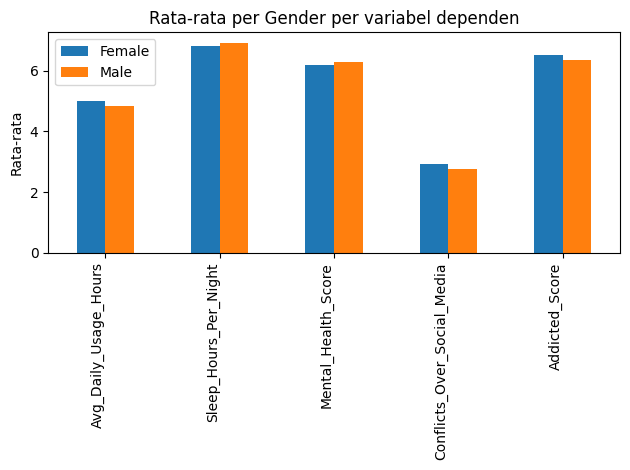

In [ ]:
# Visualisasi Rata-rata per Gender untuk variabel dependen
# Dependent variables used in MANOVA
dependent_vars = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

# Group by 'Gender' and calculate the mean for the dependent variables
data_manova.groupby('Gender')[dependent_vars].mean().T.plot(kind='bar')


plt.title('Rata-rata per Gender per variabel dependen')
plt.ylabel('Rata-rata')
plt.xticks(rotation=90, ha='right') # Mengubah rotasi label sumbu x menjadi vertikal
plt.legend(loc='upper left') # Memindahkan legend agar tidak menutupi label di bawah
plt.tight_layout() # Menyesuaikan layout agar semua elemen terlihat
plt.show()